# 그래프 기초 (교재 10장 1,2,3 절)</h1>
### 그래프는 컴퓨터 사이언스에서 풀고자하는 많은 문제들을 표현하는 데 매우 유용하다. 

## 1.  연결 그래프 표현 
####  수학에서 그래프 $G$ 는 $G=(V, E) ~~where~~ V ; Node~ Set, ~~E; Edge ~Set $  로 정의됩니다.  
#### 다음 [그림 1]  의 그래프에 대해,  파이썬에서는 이를 어떻게 표현하는 게 좋을 지를 살펴 봅시다. 
![Alttext](fig1.png)


###  가.   테이블 데이터 표현의 직접적 표현 

#### 먼저, 데이터를 테이블 형식으로 표현하고자 할 때, 유용한 파이썬 라이브러리 패키지로 '[pandas](https://pandas.pydata.org/)' 가 있습니다. 
#### 'pandas' 는 1차원 데이터 표현으로 'Series', 2차원 데이터 표현으로 'Dataframe' 이라는 자료구조를 제공하며, 'Dataframe'을 시각적으로 표현한다면 테이블 형식으로 표현하고 비쥬얼라이제이션 할 수있습니다. 

#### 아래 파이썬 코드는   Panda 의 'Dataframe'  을 이용하여 테이블 형테로 표현하는 것을 보여줍니다.

In [1]:
from pandas import DataFrame

connectivity = {'B':  [0, 0, 1, 1, 1, 1],
           'E':  [0, 0, 1, 1, 0, 0],
           'F' : [1, 1, 0, 1, 1, 0],
           'L': [1, 1, 1, 0, 1, 1], 
           'N': [1, 0, 1, 1, 0, 1], 
           'S': [1, 0, 0, 1, 1, 0]
            }
cities = ['B', 'E', 'F', 'L', 'N' , 'S']
connectivity_graph = DataFrame(connectivity, columns=['B', 'E', 'F', 'L', 'N', 'S'], index=cities)
connectivity_graph

,B,E,F,L,N,S
B,0,0,1,1,1,1
E,0,0,1,1,0,0
F,1,1,0,1,1,0
L,1,1,1,0,1,1
N,1,0,1,1,0,1
S,1,0,0,1,1,0


### 나.  그래프 정의 표현 
####  앞에서 설명했듯이, 수학에서 그래프 $G$ 는 $G=(V, E)~~~ V ; Node Set, E; Edge Set ~~$  로 정의됩니다.  다음은 상기 [그림 1]의 그래프를 노드 집합 $V$ 과 에지 집합 $E$으로 표현해 봅니다.

### Node Set 표현
####  노드를 나타낼 때,  노드를 표시하는 기호를  사용하는 게 일반적입니다. 따라서,  상기 [그림 1]  그래프의 노드 집합은 파이썬에서는  다음과 같이 표현할 수있습니다. 

In [2]:
V = {'B', 'E', 'F', 'L', 'N',  'S' } 

### Edge Set 표현
#### 에지를 나타낼 때,  시작노드와 종단 노드의 순서쌍으로 표시합니다. 따라서, 파이썬에서는 튜플을 사용합니다.  그런데, 무방향 그래프에서 에지 ('B','F') 는 에지 ('F', 'B')와 동일합니다. 따라서, 무방향 그래프 에지 집합에서는 2개의 동일한 에지 표현에서 하나만 포함시켜야 합니다.  보통  시작노드의 알파벳이 작은 순서(즉, 여기서는 ('B','F'))를 포함합니다.  
#### 따라서,  상기 [그림 2]  그래프의 에지 집합은 파이썬에서는  다음과 같이 표현할 수있습니다. 

In [3]:
E={('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')}

In [4]:
len(E)

11

In [5]:
G=(V,E)
G

({'B', 'E', 'F', 'L', 'N', 'S'},
 {('B', 'F'),
  ('B', 'L'),
  ('B', 'N'),
  ('B', 'S'),
  ('E', 'F'),
  ('E', 'L'),
  ('F', 'L'),
  ('F', 'N'),
  ('L', 'N'),
  ('L', 'S'),
  ('N', 'S')})

####  노드 집합 표현으로  집합 데이터 타입을 사용해도 되나  순서를 매겨놓는 게  차후 처리에 유용합니다.  그런데,  노드  표시 기호들이  변경되면 곤란하므로  immutable 인 tuple 데이터 타입을 이용하는 게  적절합니다.  
####   또한, 에지 집합도 나중의 처리를 위해서는 순서를 매겨 놓는 게 좋아서, 에지들의 리스트 형태로 표현하는 게 더 적절합니다. 

In [6]:
V1 = ('B', 'E', 'F', 'L', 'N',  'S' )
E1=[('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]


In [7]:
len(E1)

11

## 2.  그래프 표현 

#### 위 [그림 1]의 그래프를 표현하는 방법으로는 'adjacency list', 'adjacency matrix' 등이 있습니다. 

### adjacency list 표현
#### [그림 1]에 대한 adjacency list 표현은 [그림 2] 와 같습니다. 
![Alttext](fig2.png)

#### [그림 2]의  adjacency list 표현은  파이썬에서는 다음과 같이 'dictionary' 데이터 타입을 이용하는 게 적절합니다. 

In [8]:
graph = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N']  }


#### adjacency list 의 딕셔너리 표현이 정렬이 된 상태로 표현되는 것이 좋습니다.
#### 즉,  ![Alttext](adjlist_arrange.png)

In [9]:
# Sort dictionary
def sort_dictionary(adjL):
    tmp=dict(sorted(adjL.items()))
  #  print(tmp)
    for s in tmp:
      #  print(s)
      tmp[s].sort()
    return tmp

In [10]:
graph1 = {
       'F': ['L', 'N', 'B', 'E'],
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
      
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N']  }

sort_dictionary(graph1)

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

#### 상기 표현은 노드 세트 및 에지 세트 모두를 하나의 dictionary 데이터 타입으로 간결하게 표현 했음을 알 수있습니다. 
#### 상기 표현으로 부터, 노드 세트 $V$ 및 에지 세트 $E$  를 구할 수있습니다. 

In [11]:
def node_Edge_from_adjacency_list(adjL):
    adjList=sort_dictionary(adjL)
    TV=list()
    TE=list()
    for key in adjList:
        TV.append(key)
        for i in adjList[key]:
            if (key, i) not in TE and (i, key) not in TE:
                TE.append((key, i))
    return tuple(TV), TE

In [12]:
V2, E2= node_Edge_from_adjacency_list(graph)
print('V2=', V2)
print('E2=', E2)

V2= ('B', 'E', 'F', 'L', 'N', 'S')
E2= [('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]


In [13]:
print(E1==E2)

True


In [14]:
V3, E3= node_Edge_from_adjacency_list(graph1)
print('V3=', V3)
print('E3=', E3)

V3= ('B', 'E', 'F', 'L', 'N', 'S')
E3= [('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]


In [15]:
print(V3==V2)
print(E3==E2)

True
True


#### 노드 세트 $V$와 에지 세트 $E$ 로 구성되는 그래프 $G=(V,E)$ 의 그래프 표현으로부터 그래프의 'adjacency list' 표현을 구해봅시다.
$V = \{'B', ~'E', ~'F', ~'L', ~'N', ~ 'S' \} $ 
$E=\{('B',~ 'F'), ('B', ~'L'), ('B', ~'N'), ('B', ~'S'),('E', ~'F'),('E', ~'L'), ('F', ~'L'), ('F', ~'N'), ('L', `'N'), ('L', `'S'), ('N', ~'S')\}$  
$G= (V,~ E)$
#### 여기서, 주의해야 할 점은 무방향 그래프에서 에지 ('B','F') 는 에지 ('F', 'B')와 동일하다는 것입니다. 따라서, 무방향 그래프 에지 집합에서는 2개의 동일한 에지 표현에서 하나만 포함한다는 점입니다.  adjacent list 에서는 각 노드에 대한 인접한 노드들을 모두 리스트업합니다.  ('B','F') 에지 표현에서는 'F' 노드가 'B' 노드의 인접 노드임을 가르키며, ('F','B') 에지 표현에서는 'B' 노드가 'F' 노드의 인접 노드임을 가르킨다는 것에 주목하여, adjacent list 처리를 위한 에지 세트에서는 그래프    $G=(V,E)$ 의 에지세트 $E$ 와 다르게,   ('B','F'),  ('F','B') 2개 모두를 포함하여 처리하는 게 좋습니다. 

In [16]:
def adjacency_list_from_Graph(graph): #graph=(V, E) ==> V=graph[0], E=graph[1]
    VL=list(graph[0])
    VL.sort() # sorted node(vertex) list
    EL=list(graph[1])
    EL.sort()  # sorted edge list
    TS=set()  # adjacent list 처리를 위한 에지 세트
    adjList=dict()
    tmp= [[] for _ in range(len(VL))]
    for item in EL:
        TS.add(item)
        if (item[1], item[0]) not in TS:  #(B, F) 가 에지이면, (F,B) 도 에지 세트에 포함
            TS.add((item[1], item[0]))
    TL=list(TS) #에지 세트를 정렬하기 위해 에지 리스트로 변환
    TL.sort()
    i=0
    # 에지의 시작 노드가  adjacency list dictionary 의 key 와 같으면, 해당 에지노드의 종단노드를 adjacent list  의 해당 키 노드의 인접 노드 리스트에 추가한다.에 추가한다.
    for node in VL:
        for edge in TL:
            if edge[0]==node:
                   tmp[i].append(edge[1])        
        adjList.update({node:tmp[i]})  #node:tmp[i] 는 '"B': ['F', 'L', 'N', 'S']" 형태임
        i+=1
    return  adjList   

In [17]:
V = {'B', 'E', 'F', 'L', 'N',  'S' } 
E={('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')}
G=(V,E)

In [18]:
adjL_s=adjacency_list_from_Graph(G)
adjL_s

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

In [19]:
V1 = {'L', 'N',  'S' , 'B', 'E', 'F' } 
E1={('F', 'B'), ('L', 'B'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')}
G1=(V1,E1)

In [20]:
adjL_s1=adjacency_list_from_Graph(G1)
print("adjL_s1=\n{} \n".format(adjL_s1))
print(adjL_s==adjL_s1)      

adjL_s1=
{'B': ['F', 'L', 'N', 'S'], 'E': ['F', 'L'], 'F': ['B', 'E', 'L', 'N'], 'L': ['B', 'E', 'F', 'N', 'S'], 'N': ['B', 'F', 'L', 'S'], 'S': ['B', 'L', 'N']} 

True


### adjacency matrix 표현
####  상기 [그림 1] 그래프에 대한 adjacency matrix 표현은 다음 [그림 3]과 같습니다. 
![Alttext](fig3.png)

### 다음은 'adjacency list' 로 부터,  'adjacency matrix' 를 생성하는 파이썬 함수입니다. 

In [21]:
def Adj_Mat(adjL):  #adjL 은 딕셔너리타입의 adjacency list
    n=len(adjL) # n = 노드 갯수 
    nodes =list()    
    adjList=sort_dictionary(adjL) #정렬된 adjacency list
    #print("adjList={}".format(adjList))
    for key in adjList:  # node  리스트 초기화 
        nodes.append(key)
   
    nodes.sort() # 노드 사전식 정렬
   # print("nodes={}".format(nodes))
    adM= [[] for _ in range(n)]     # adM; adjacency matrix; nxn adjacency matrix 생성 
    
    k=0 # k; adjacency matrix의 행 . k=0 은 첫번째 행 
    j=0 # adjacency matrix의 행에서 현재까지 처리에서 마지막 1 요소 다음 번째 ("'B': ['F', 'L', 'N', 'S']" 에서 첫번째 인접 노드 'F' 처리시, j=3 이며,
            # 이때, adjacency matrix의 첫번째 행에서 4번째 요소 위치(파이썬에서는 0 부터 시작하니, 3으로 표시됨) 
    for node in nodes:        
        if adjL[node]: # adjacency list 에서 해당 노드의 인접노드 리스트
            for s in adjL[node]:
                i=0 # 행에서 요소 순서 (i=0 --> 해당 행에서 첫번째 요소)   
               # print("node={}, str={}".format(node,s))
                while(i < n):                   
                    if i>=j:                       
                        if s == nodes[i]:
                            adM[k].append(1)
                            j=i+1 #j 는           
                            i=n
                        else:
                            adM[k].append(0)  
                            i+=1
                    else:
                        i+=1
            if j< n: 
                for _ in range(j, n):
                    adM[k].append(0)  
            
        else:
            for _ in range(n):
                adM[k].append(0)
        k+=1
        j=0
    return adM    

In [22]:
print(adjL_s)
adjL_S={ 'E': ['F', 'L'], 'B': ['S', 'L', 'N', 'F'], 'F': ['B', 'E', 'L', 'N'], 'L': ['B', 'E', 'F', 'N', 'S'], 'N': ['B', 'F', 'L', 'S'], 'S': ['B', 'L', 'N']}
adjM_List=Adj_Mat(adjL_S)
adjM_List

{'B': ['F', 'L', 'N', 'S'], 'E': ['F', 'L'], 'F': ['B', 'E', 'L', 'N'], 'L': ['B', 'E', 'F', 'N', 'S'], 'N': ['B', 'F', 'L', 'S'], 'S': ['B', 'L', 'N']}


[[0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 1, 0],
 [1, 1, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 0]]

### adjacency matrix 에서 adjacency list 로 표현 
####  다음 코드는 adjacency matrix 에서 adjacency list 로의  변환 이다. 

In [23]:
def adjL(nodes, adjM): # nodes; 노드 리스트, adjM : adjacency matrix
    nodes.sort() # 노드 정렬
    adj_list=dict()
    n=len(adjM[0])
    for s in nodes:
        adj_list.update({s:[]}) # adjacency list 딕셔너리 정렬
    i=0
    for s in nodes:
        for j in range(n):
            if adjM[i][j]==1:
                    adj_list[s].append(nodes[j])
        i+=1                               
    return adj_list             

In [24]:
Nodes_s = ['E', 'B','F', 'L', 'N',  'S' ]
graph_L=adjL(Nodes_s, adjM_List)
graph_L    

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

In [25]:
graph_s = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N']  }


In [26]:
if graph_L==graph_s:
    print("Same")
else:   
    print("Not Same")

Same


## 3.  가중치 그래프 표현 

#### 강의노트에서 취급한 다음의 테이블 데이터를  그래프로 표현하는 방법을 알아 봅시다.
![Alttext](table2.png)

#### 상기 테이블 데이터에 대한 그래프 표현은 [그림 4]와 같은 가중치 그래프(weigted graph) 로 표현할 수있습니다.
![Altext](fig4.png)

#### 상기 [그림 4]에 대한, pandas 를 이용한  테이블 표현은 다음과 같습니다

In [27]:
from pandas import DataFrame

distance = {'B':  [0,     0, 245, 115, 145, 175],
            'E':  [0,     0, 450, 645,   0,   0],
            'F':  [245, 450,   0, 220, 385,   0],
            'L':  [115, 645, 220,   0, 260, 125], 
            'N':  [145,   0, 385, 260,   0, 320], 
            'S':  [175,   0,   0, 125, 320,   0]
            }
cities = ['Barstow', 'Eureka', 'Fresno', 'Los Angeles', 'Needles' , 'San Diego']
cal_cit_dis = DataFrame(distance, columns=['B', 'E', 'F', 'L', 'N', 'S'], index=cities)
cal_cit_dis

,B,E,F,L,N,S
Barstow,0,0,245,115,145,175
Eureka,0,0,450,645,0,0
Fresno,245,450,0,220,385,0
Los Angeles,115,645,220,0,260,125
Needles,145,0,385,260,0,320
San Diego,175,0,0,125,320,0


#### 상기 테이블 표현은 'weighted adjacency matrix'  표현입니다. 즉
$ [[  ~~0,   ~~~0,  ~~245, ~115, 145, 175],  $   
$ ~ [ ~~ 0,   ~~~0,  ~~450, ~645,   ~~~0,   ~~~~~0],  $   
$   [245, 450,    ~~~0, ~220, ~~385,   ~~~0],  $  
$   [115, 645, 220,  ~~~ 0, ~~260, 125],  $  
$   [145,   ~~~0,  ~385, 260,  ~~~~~0, 320],  $  
$   [175,   ~~~0,    ~~~0, ~125, ~~320,   ~~~0] ]  $
   

#### 상기 [그림 4]의 가중치 그래프에 대한 ' adjacency list' 표현의 하나는 다음과 같습니다.

In [28]:
weight_adjacency_list = {
             'B': [['F', 245], ['L', 115], ['N', 145], ['S', 175]],
             'E': [['F', 450],['L', 645]],
             'F': [['B', 245], ['E', 450],['N', 385]],         
             'L': [['B', 115], ['E', 645],['F', 220],['N', 260],['S', 125]],
             'N': [['B', 145], ['F', 385],['L', 260],['S', 320]],             
             'S': [['B', 175], ['L', 125],['N', 320]]  }

## 4. 'networkx'  패키지를 활용한 그래프 문제 풀기 

### Graph 다루는 파이선 패키지로 'networkx' (https://networkx.github.io/) 가 있습니다.   

#### 'networkx' 패키지 활용 참고 자료 : http://pythonkr.github.io/pyconkr-2014/pdf/pyconkr-2014-07_networkx.pdf

#### 이를 이용하여 그래프를 생성해봅시다. 
#### 'networkx' 에서는 그래프 정의와 같이,  노드 집합과 에지 집합을 리스트 데이터 타입으로 하여  노드들과 에지들을 등록하여 그래프를 생성하도록 지원한다. 

In [29]:
import networkx as nx # networkx 패키지 임포트
G=nx.Graph()
Nodes=['B', 'E', 'F', 'L', 'N',  'S' ]
G.add_nodes_from(Nodes)
E=[('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('E', 'F'),('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]
# adding a list of edges:
G.add_edges_from(E)

In [30]:
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]


#### 'networkx' 패키지 에서는 등록된 그래프의  인접 행렬을 쉽게 구해준다. 

In [31]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 0.],
        [1., 1., 0., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0.]])

In [32]:
graph_s = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N']  }


####  'networkx' 패키지 에서는 그래프 그리기도 지원합니다. 각 노드의 위치는 'networkx.spring_layout(G)' 함수 호출을 통해서,  각 노드의 (x,y)  좌표값의 딕셔너리 데이터를 리턴합니다.  'networkx.spring_layout(G)' 에서 각 노드 좌표값을 계산하기 위해 사용되는 알고리즘으로는  원하는 모양의 그래프가 그려지기 힘드므로, 직접 각 노드의 좌표값을 지정하여 줄 수있습니다.

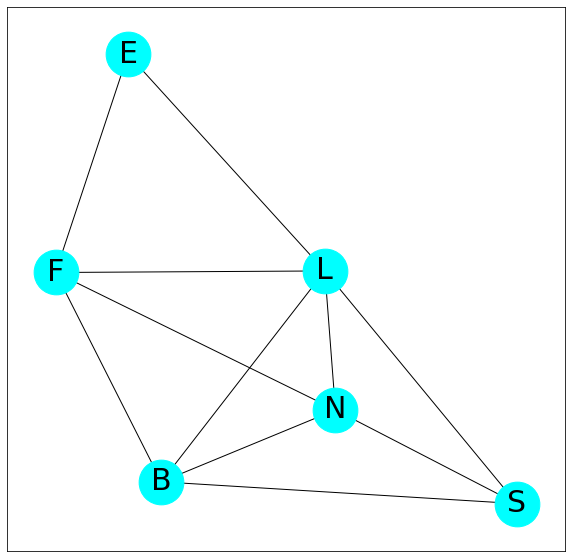

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
B, E, F, L, N, S = 'BEFLNS'
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos, font_size=30)
plt.show()

#### 이제 [그림 1] 과 유사한 모양의 그래프를 그려보기로 합시다. 

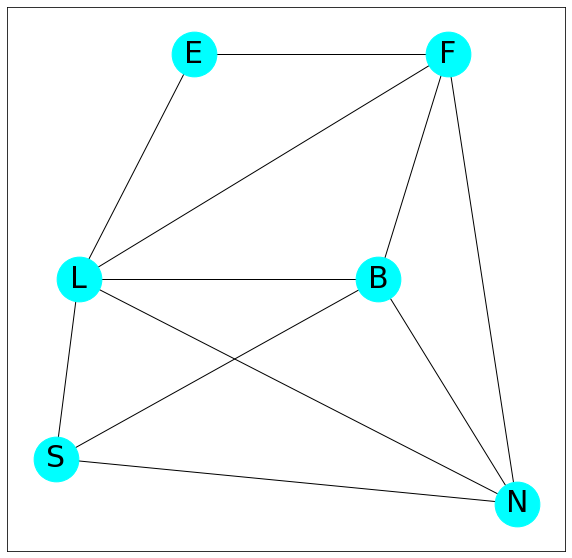

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
B, E, F, L, N, S = 'BEFLNS'
#pos=nx.spring_layout(G)
pos = {S:(-1, -0.8), N:(1, -1.0), L:(-0.9, 0), B:(0.4, 0), F:(0.7, 1), E:(-0.4, 1)} #직접 각 노드의 좌표값 지정.
nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos, font_size=30)
plt.show()

#### 'S' 노드와 연결되어 있는 노드는 아래 코드로 찾을 수 있습니다.

In [38]:
print(G['S'])

{'B': {}, 'L': {}, 'N': {}}


####  'networkx' 패키지에서는  노드 및 에지 순서는 상관하지 않습니다.

In [39]:
G1=nx.Graph()
Nodes=['S', 'B', 'L', 'N', 'E', 'F' ]
G1.add_nodes_from(Nodes)

# adding a list of edges:
G1.add_edges_from([('S', 'L'), ('S', 'B'),  ('S', 'N'),('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), 
                   ('N', 'F'), ('E', 'F') ])
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges())

Nodes of graph: 
['S', 'B', 'L', 'N', 'E', 'F']
Edges of graph: 
[('S', 'L'), ('S', 'B'), ('S', 'N'), ('B', 'F'), ('B', 'L'), ('B', 'N'), ('L', 'E'), ('L', 'F'), ('L', 'N'), ('N', 'F'), ('E', 'F')]


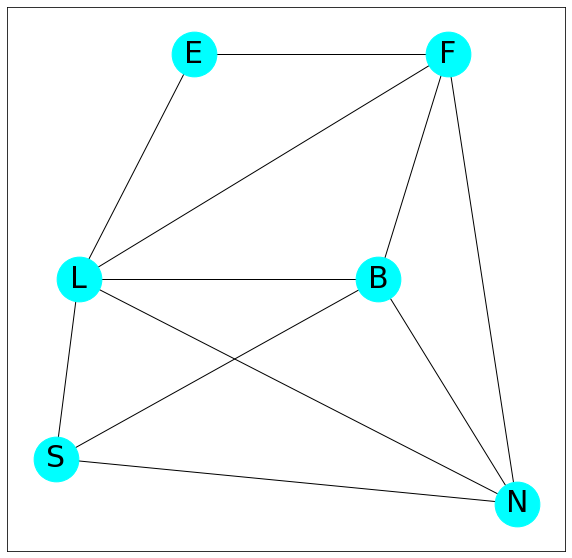

In [40]:
plt.figure(figsize=(10, 10))
B, E, F, L, N, S = 'BEFLNS'
pos = {S:(-1, -0.8), N:(1, -1.0), L:(-0.9, 0), B:(0.4, 0), F:(0.7, 1), E:(-0.4, 1)}
nx.draw_networkx_nodes(G1, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G1, pos=pos)
nx.draw_networkx_labels(G1, pos=pos, font_size=30)
plt.show()


#### 위 그래프에서 거리(weight)를 추가한 그래프를 새로 만들어 봅니다.

In [41]:
G2=nx.Graph()
Nodes=[ 'B', 'E', 'F', 'L', 'N',  'S' ]
G2.add_nodes_from(Nodes)
G2.add_weighted_edges_from([('B', 'F', 245), ('B', 'L', 115), ('B', 'N', 145), ('B', 'S', 175 ), ('E', 'F', 450), ('E', 'L', 645), ('F', 'L', 220), ('F', 'N', 385), ('L', 'N', 260), ('L', 'S', 125),  ('N', 'S', 320) ])
print("Nodes of graph: ")
print(G2.nodes())
print("Weighted Edges of graph: ")
print(G2.edges())

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Weighted Edges of graph: 
[('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('F', 'N'), ('L', 'N'), ('L', 'S'), ('N', 'S')]


이제 'S' 노드와 연결되어 있는 노드를 출력하면 거리값도 같이 출력됨을 알 수 있다.

In [42]:
print(G2['S'])

{'B': {'weight': 175}, 'L': {'weight': 125}, 'N': {'weight': 320}}


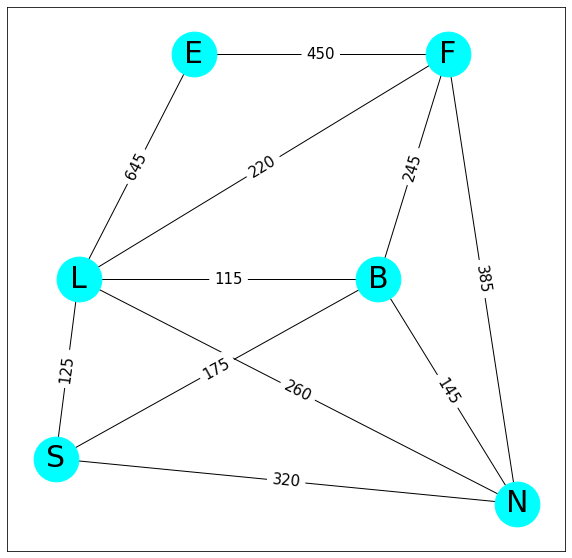

In [43]:
plt.figure(figsize=(10, 10))
B, E, F, L, N, S = 'BEFLNS'
pos = {S:(-1, -0.8), N:(1, -1.0), L:(-0.9, 0), B:(0.4, 0), F:(0.7, 1), E:(-0.4, 1)} 
nx.draw_networkx_nodes(G2, pos=pos, node_size=2000, node_color='cyan')
nx.draw_networkx_edges(G2, pos=pos)
nx.draw_networkx_labels(G2, pos=pos, font_size=30)
edge_labels = {(u, v): d['weight'] for u, v, d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos=pos, edge_labels=edge_labels, font_size=15)
plt.show()

####  'networkx' 패키지에서는, 그래프의 다양한 알고리즘을 지원합니다.
#### 다음은 그래프의 시작 노드에서 종단 노드까지의 최단 거리 패스 및 거리값을 구해봅니다. 

In [44]:
nx.shortest_path(G2, "S", "F", "weight")

['S', 'L', 'F']

In [45]:
nx.shortest_path_length(G2, "S", "F", "weight")

345

<br/><br/><br/><br/>
<h1> 실습 문제 </h1>


###  다음과 같은 [그림 5] 의 그래프에 대해서 아래 질문들에 답하시오.

![Exercise](fig5.png)

###  실습 1. 
####  [그림 5] 의 그래프에 대해,  ' adjacency list' 표현의 파이썬 코드를 구하시오.


#### 상기 [그림 5] 의 그래프에 대해, ' adjacency list' 표현의 파이썬 코드는 다음과 같습니다.

In [5]:
weight_adjacency_list = {
             'A': [['B', 2], ['F', 7], ['G', 3]],
             'B': [['A', 2],['C', 4], ['G', 6]],
             'C': [['B', 4], ['D', 2],['H', 2]],         
             'D': [['C', 2], ['E', 1],['H', 8]],
             'E': [['D', 1], ['F', 6],['I', 2]],             
             'F': [['A', 7], ['E', 6],['I', 5]],
             'G': [['A', 3], ['B', 6],['H', 3], ['I', 1]] ,
             'H': [['C', 2], ['D', 8],['G', 3], ['I', 4]],
             'I': [['E', 2], ['F', 5],['G', 1], ['H', 4]] 
    
}

###  실습 2(a). 
####   'weighted  adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  표현을 구할 수있는  파이썬 함수를 코딩하여 보시오. (node 순서는  알파벳 올림차순 임(즉,  A,  B, C, D, E, F, G, H, I.)

In [6]:
def Adj_Mat_W(adjL):  
    n=len(adjL)
    nodes =list()    
    for key in adjL:
        nodes.append(key)
   
    adM= [[] for _ in range(n)]    
    
    k=0
    j=0    
    for node in nodes:        
        if adjL[node]:
            for s in adjL[node]:
                i=0
               # print("node={}, str={}".format(node,s))
                while(i < n):                   
                    if i>=j:                       
                        if s[0] == nodes[i]:
                            adM[k].append(s[1])
                            j=i+1           
                            i=n
                        else:
                            adM[k].append(0)  
                            i+=1
                    else:
                        i+=1
            if j< n: 
                for _ in range(j, n):
                    adM[k].append(0)  
            
        else:
            for _ in range(n):
                adM[k].append(0)
        k+=1
        j=0
    return adM    

###  실습 2(b)
#### 실습 2(a)에서 구한 함수를 이용하여, 실습1  의 [그림 5] 의 그래프에 대한  ' adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  을 구하여 보시오. 

In [7]:
Adj_Mat_W(weight_adjacency_list)

[[0, 2, 0, 0, 0, 7, 3, 0, 0],
 [2, 0, 4, 0, 0, 0, 6, 0, 0],
 [0, 4, 0, 2, 0, 0, 0, 2, 0],
 [0, 0, 2, 0, 1, 0, 0, 8, 0],
 [0, 0, 0, 1, 0, 6, 0, 0, 2],
 [7, 0, 0, 0, 6, 0, 0, 0, 5],
 [3, 6, 0, 0, 0, 0, 0, 3, 1],
 [0, 0, 2, 8, 0, 0, 3, 0, 4],
 [0, 0, 0, 0, 2, 5, 1, 4, 0]]

### 실습 3.
#### "networkx'  파이썬 패키지를 사용하여 [그림 5]의 그래프를 그려 보시오. 단, 아래 pos 변수를 이용하여 출력 예시와  반드시 동일하게 출력해야 합니다.

In [11]:
# 그래프 위치에 관한 dictionary. 
# https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
pos = {A:(1, 2),B:(3, 2),C:(4, 1),D:(3, 0),E:(1, 0),F:(0, 1),G:(2, 1.5),H:(3, 1),I:(1, 1)}

<출력 예시>

![Altext](prob0.png)

<br/>※ 풀이조건
<ol>
    <li>그래프를 그릴 때 크기 및 색상은 자유롭게 하되, 각 노드 및 엣지를 '알아볼 수 있도록' 그린다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>pos 변수를 사용하여 각 노드 및 엣지의 위치는 위 출력 예시와 동일하게 출력되어야 한다. 안 되었을 시 0.5점 감점한다.</li>
</ol>


In [12]:
import networkx as nx
from matplotlib import pyplot as plt

In [13]:
def draw_graph(graph, pos=None) :
    if pos == None : pos=nx.spring_layout(graph)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(graph, pos=pos, node_size=2000, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=30)
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_size=20, rotate=False)
    plt.show()

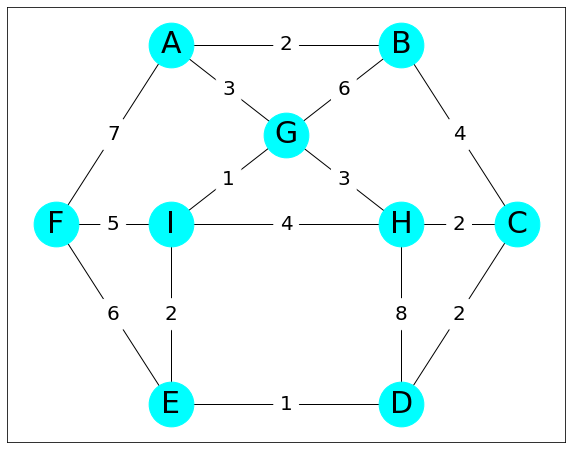

In [14]:
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
graph=nx.Graph()
nodes=[A,B,C,D,E,F,G,H,I]
edges=[(A, B, 2), (A, G, 3), (A, F, 7), (B, C, 4), (B, G, 6), (C, D, 2), (C, H, 2), 
       (D, E, 1), (D, H, 8), (E, F, 6), (E, I, 2), (F, I, 5), (G, I, 1), (G, H, 3), (H, I, 4)]


graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

draw_graph(graph, pos)

#### 실습  4.
#### "networkx' 파이썬 패키지를 사용하여 위에서 그린 그래프에서 노드 F 에서 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 각각 구하여 출력하시오. 단, 아래 출력 예시에 맞게 출력해야 합니다.

<출력 예시>
<br/>노드 F에서 노드 E까지 최단 경로는 ['F', 'E'] 이며 최단 거리는 6 이다.

※ 풀이조건
<ol>
    <li>"networkx' 파이썬 패키지 내 함수 및 클래스를 사용하여 시작 노드를 F로, 도착 노드를 B, C, D, H, G 중 하나씩 설정해서 총 5개의 최단 경로와 최단 거리를 구하여 출력한다. (예: (F-B), (F-C), (F-D), (F-H), (F-G) 로, 총 5개)</li>
    <li>최단 경로가 2개 이상일 경우 아무 것이나 1개를 택하여 출력한다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>5개 경로 및 거리가 모두 올바른 값이면 정답 처리 한다.</li>
    <li>다른 패키지 함수를 이용하여 간단히 구현해도 정답처리한다. 단 실습 3의 답과 동일하게 구현하면 0점 처리한다.</li>
</ol>


In [15]:
import networkx as nx

src = 'F'
dst = 'BCDHG'
for d in dst :
    print('노드 '+src+'에서 노드 '+d+'까지 최단 경로는',
          nx.shortest_path(graph, src, d, "weight"),
          '이며 최단 거리는',
          nx.shortest_path_length(graph, src, d, "weight"),
          '이다')

노드 F에서 노드 B까지 최단 경로는 ['F', 'A', 'B'] 이며 최단 거리는 9 이다
노드 F에서 노드 C까지 최단 경로는 ['F', 'E', 'D', 'C'] 이며 최단 거리는 9 이다
노드 F에서 노드 D까지 최단 경로는 ['F', 'E', 'D'] 이며 최단 거리는 7 이다
노드 F에서 노드 H까지 최단 경로는 ['F', 'I', 'H'] 이며 최단 거리는 9 이다
노드 F에서 노드 G까지 최단 경로는 ['F', 'I', 'G'] 이며 최단 거리는 6 이다
